In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

# Exercice 3

Trois coffres contiennent respectivement une pièce d'or et une pièce d'argent, 2 pièces d'or et 2 pièces d'argent. On choisit une pièce dans un des trois coffres. C'est une pièce d'or. Quelle est la probabilité pour que la seconde pièce soit également en or ?
(Problème posé par le mathématicient Joseph Bertrand)

p(P2=Or/P1=Or) = p(P2=Or,P1=Or)/p(P1=Or)=1/3 / 1/2 = 2/3

inferences :


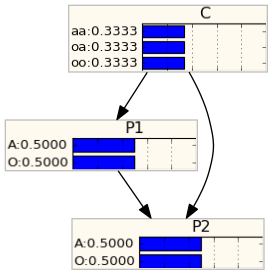

inferences :


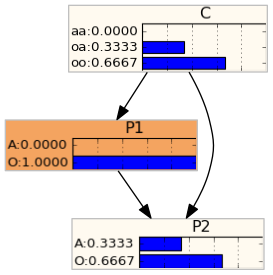

In [21]:
# definition des noeuds
c = gum.LabelizedVariable("C","coffre",0).addLabel("oo").addLabel("oa").addLabel("aa")
p1 = gum.LabelizedVariable("P1","",0).addLabel("O").addLabel("A")
p2 = gum.LabelizedVariable("P2","",0).addLabel("O").addLabel("A")
# définition du réseau
bn = gum.BayesNet()
# definition des variables des deux dés
cc = bn.add(c)
pp1 = bn.add(p1)
pp2 = bn.add(p2)

# defintion des arcs
bn.addArc(cc,pp1)
bn.addArc(cc,pp2)
bn.addArc(pp1,pp2)
import pyAgrum.lib.notebook as nb
nb.showBN(bn)
# definition des cpt
bn.cpt(cc).fillWith([1]*3).normalize()

bn.cpt(pp1)[{"C": "oo"}] = [1,0]
bn.cpt(pp1)[{"C": "oa"}] = [0.5,0.5]
bn.cpt(pp1)[{"C": "aa"}] = [0,1]


bn.cpt(pp2)[{"C": "aa","P1":"O"}] = [0.5,0.5]
bn.cpt(pp2)[{"C": "aa","P1":"A"}] = [0,1]
bn.cpt(pp2)[{"C": "oa","P1":"O"}] = [0,1]
bn.cpt(pp2)[{"C": "oa","P1":"A"}] = [1,0]
bn.cpt(pp2)[{"C": "oo","P1":"O"}] = [1,0]
bn.cpt(pp2)[{"C": "oo","P1":"A"}] = [0.5,0.5] # par defaut on met [0.5,0.5]
print("inferences :")                                     
gnb.showInference(bn)
print("inferences :")                                     
gnb.showInference(bn,evs={"P1":"O"})
